In [1]:
from utils.feature_utils import extract_log_features, extract_hog_features, extract_normals_features, extract_gabor_features, extract_wavelet_features
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import os
from PIL import Image


In [2]:
# Import training data from pickle file (scalars)

filename = './pkls/train_0406.pkl'
train_df = pd.read_pickle(filename)

In [3]:
# Create the images array, each row is one image
#Convert images to feature array and find labels"
def parse_img(folder_path):
    image_vectors = []  # image data\n",
    labels = []  # labels\n",

    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            parts = filename.split('_')
            fabType = parts[0]
            image = Image.open(os.path.join(folder_path, filename)).convert('L')
            img_array = np.array(image)

            # normalize the image vector to be between 0 and 1 \n",
            img_array_std = (img_array - np.mean(img_array)) / np.std(img_array)
            img_array = np.array(img_array_std)
            image_vectors.append(img_array)
            labels.append(fabType)

    X = np.array(image_vectors)
    Y = np.array(labels)
    return X, Y

PCA

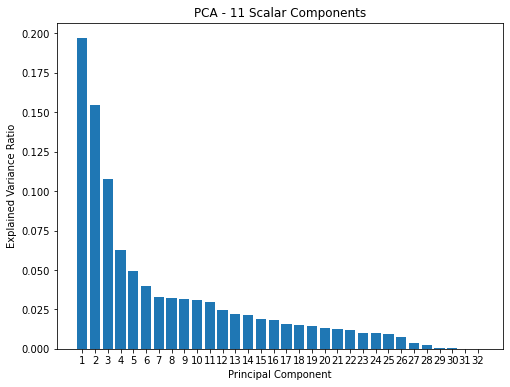

In [4]:
# isolate the feature columns 
features = train_df.iloc[:, 2:]

# standardize the features (important for PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# perform PCA
pca = PCA()
pca.fit(features_scaled)

# create a scree plot (explained variance ratios)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - 11 Scalar Components')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure x-ticks for each component
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (32,).

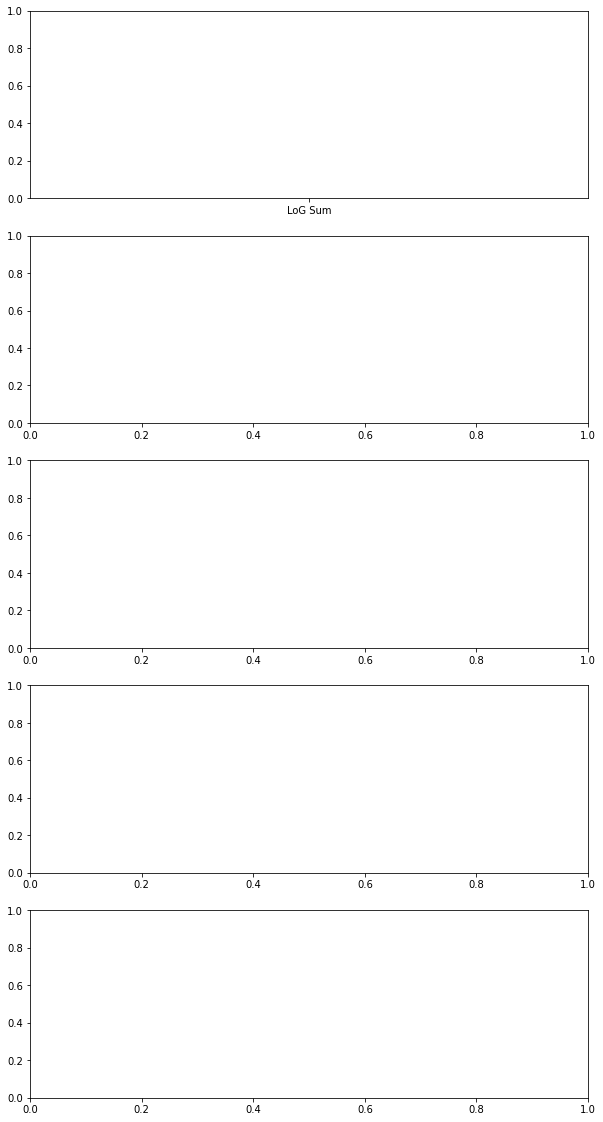

In [5]:
# Assuming 'pca' is your fitted PCA object from sklearn and 'feature_names' are your original feature names
# Let's say there are N features
N = len(pca.components_[0])
feature_names = ['LoG Sum',
                 'Normals Sum',
                 'Gabor Sum',
                 'BoVW Sum',
                 'hog_mean', 
                 'hog_sum', 
                 'hog_var', 
                 'hog_skew', 
                 'hog_kurt',
                 'wave_mean_cA', 
                 'wave_var_cA', 
                 'wave_mean_cD', 
                 'wave_var_cD'
                 ]

# Number of components to display
num_components = 5

colors = plt.cm.viridis(np.linspace(0, 1, N))

fig, axs = plt.subplots(num_components, 1, figsize=(10, num_components * 4))

# Iterate over the first 5 principal components
for i in range(num_components):
    # Get the component
    component = pca.components_[i]
    
    # Create a bar plot for each component's feature contributions
    axs[i].bar(feature_names, component, color=colors)
    axs[i].set_title(f'Principal Component {i+1}')
    axs[i].set_ylabel('Feature Contribution')
    axs[i].set_xlabel('Features')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate feature names for readability

plt.tight_layout()
plt.show()

Sum of first 2 components: 0.35158972561521273


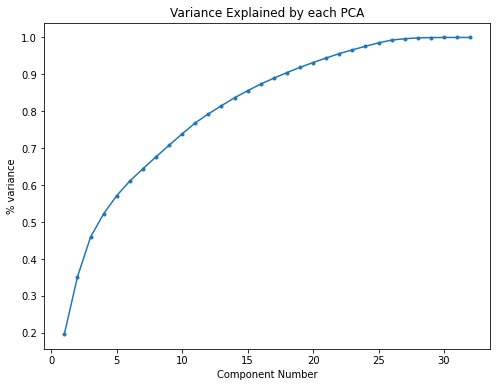

In [6]:
# PC1, PC2 component scores
print(f"Sum of first 2 components: {np.sum(pca.explained_variance_ratio_[:2])}")

variances = pca.explained_variance_ratio_

cumulatives = [] 

for i in range(len(variances)):
    if i == 0:
        cumulative = variances[i]  # For the first element, cumulative sum is the variance itself
    else:
        cumulative += variances[i]  # Accumulate the current variance to the previous cumulative sum
    cumulatives.append(cumulative)

cumulatives
# plot the explained variance (here we have to do it in the opposite side)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(N)+1,
         cumulatives,
         marker='.');
plt.ylabel("% variance")
plt.xlabel("Component Number")
plt.title("Variance Explained by each PCA")
plt.show()

### PCA over Feature Vectors

**Isi's notes** I will do it with 200 images so I can try them all


In [7]:
folder_path = './Subsamples/train'
in_imgs, label_imgs = parse_img(folder_path)

in_imgs.shape

(22128, 200, 200)

In [8]:
# Feature vector extraction
# in_imgs = X (image vectors), label_imgs = Y (labels)
#LOG
log_features_list = []

for image_array in in_imgs[:200]:
        log_feature = extract_log_features(image_array,scalar=False)
        log_features_list.append(log_feature)

log_features = np.vstack(log_features_list)
print(log_features.shape)


(200, 40000)


In [9]:
#HOG
hog_features_list = []

for image_array in in_imgs[:200]:
        hog_feature = extract_hog_features(image_array, 4, 20, scalar=False)
        hog_features_list.append(hog_feature[np.newaxis, :])
hog_features = np.vstack(hog_features_list) 
print(hog_features.shape)

(200, 2304)


In [10]:
#Normals (is crashing in my computer with the 22K image_vector) - consider not to flatten in the original function
normals_features_list = []
for image_array in in_imgs[:200]:
    normals_feature = extract_normals_features(image_array, scalar=False)
    normals_features_list.append(normals_feature)
normals_features = np.vstack(normals_features_list) #NOTE np.vstack  will stack them vertically, which would mean each row represents the features of an image. 
print(normals_features.shape)

(200, 120000)


In [11]:
#Gabor features
gabor_features_list = []
for image_array in in_imgs[:200]:
    gabor_feature = extract_gabor_features(image_array, frequency=0.6, theta=0, sigma=1.0, scalar=False)
    gabor_features_list.append(gabor_feature)
gabor_features = np.vstack(gabor_features_list)
print(gabor_features.shape)

(200, 40000)


In [12]:
#Wavelet Features
wavelet_features_list = []
for image_array in in_imgs[:200]:
    wavelet_feature = extract_wavelet_features(image_array, scalar=False)
    wavelet_features_list.append(wavelet_feature)
wavelet_features = np.vstack(wavelet_features_list)
print(wavelet_features.shape)

(200, 40000)


# the below likely needs to be redone because bovw had some implementation issues that have since been resolved - bovw should produce a 20 element feature vector for each image

In [ ]:
#BoVW features
bovw_features_list = []
for image_array in in_imgs[:200]:
    bovw_feature = extract_bovw_features(image_array, n_clusters=10,scalar=False)
    bovw_features_list.append(bovw_feature)
bovw_features = np.vstack(bovw_features_list)
print(bovw_features.shape)

### Run with functions from class

In [13]:
# Functions from class example
def get_PCA(X_list, n_components=2):
  pca_list = []
  xpca_list = []
  for X in X_list:
    # .fit we are creating the axis
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X) #pca transformation, of each of our X (data structure), whiten=True (normalization step)
    #doing the transformation into the new axis
    X_pca = pca.transform(X)
    pca_list.append(pca)
    xpca_list.append(X_pca)
  return pca_list, xpca_list

def plot_PCA(X_list,labels, colors, n_components=2):
  pca_list, xpca_list = get_PCA(X_list, n_components=n_components)

  plt.figure(figsize=(15,5))
  for i in range(len(X_list)):
    plt.plot(np.cumsum(pca_list[i].explained_variance_ratio_), colors[i], label=labels[i])
  plt.xticks(np.arange(n_components)+1)
  plt.yticks(np.linspace(0, 1, 8))
  plt.grid(True)
  plt.xlabel('Number of components')
  plt.ylabel('Explained Variances')
  plt.legend()
  plt.show()

def get_tsne(X_list, n_components=2):
  xtsne_list = []
  for X in X_list:
    tsne = TSNE(n_components=n_components, random_state=0)
    X_tsne = tsne.fit_transform(X)
    xtsne_list.append(X_tsne)
  return xtsne_list

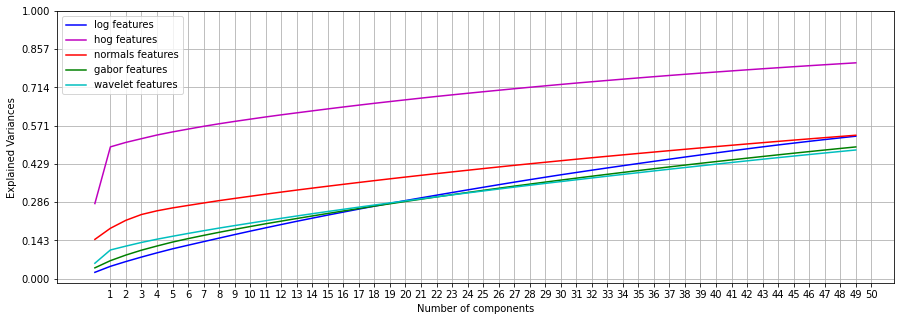

In [14]:
x = plot_PCA([log_features, 
              hog_features, 
              normals_features, 
              gabor_features, 
              wavelet_features], labels = ['log features', 
                                           'hog features', 
                                           'normals features', 
                                           'gabor features', 
                                           'wavelet features'], colors = ['b-', 'm-', 'r-', 'g-', 'c-'],n_components=50)

In [15]:
x_bovw = plot_PCA([bovw_features], ['Bovw'], ['r-'], n_components=10)

NameError: name 'bovw_features' is not defined

In [16]:
# dimensionality reduction
X_log_pca, X_hog_pca, X_normals_pca, X_gabor_pca, X_wavelet_pca = get_PCA([log_features, hog_features, normals_features, gabor_features, wavelet_features], n_components=10)[-1]
X_log_tsne, X_hog_tsne, X_normals_tsne, X_gabor_tsne, X_wavelet_tsne = get_tsne([log_features, hog_features, normals_features, gabor_features, wavelet_features], n_components=2)

In [17]:
def plot_classes(X, label, ax, title):
  label_encoder = LabelEncoder()
  y = label_encoder.fit_transform(label)

  # color code each cluster (fabrics label (5))
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]

  # project the features into 2 dimensions
  for k in range(len(np.unique(y))):
    ax.scatter(X[y==k, 0], X[y==k, 1], alpha=0.5, facecolors=colorst[k])

  ax.set_title(title)

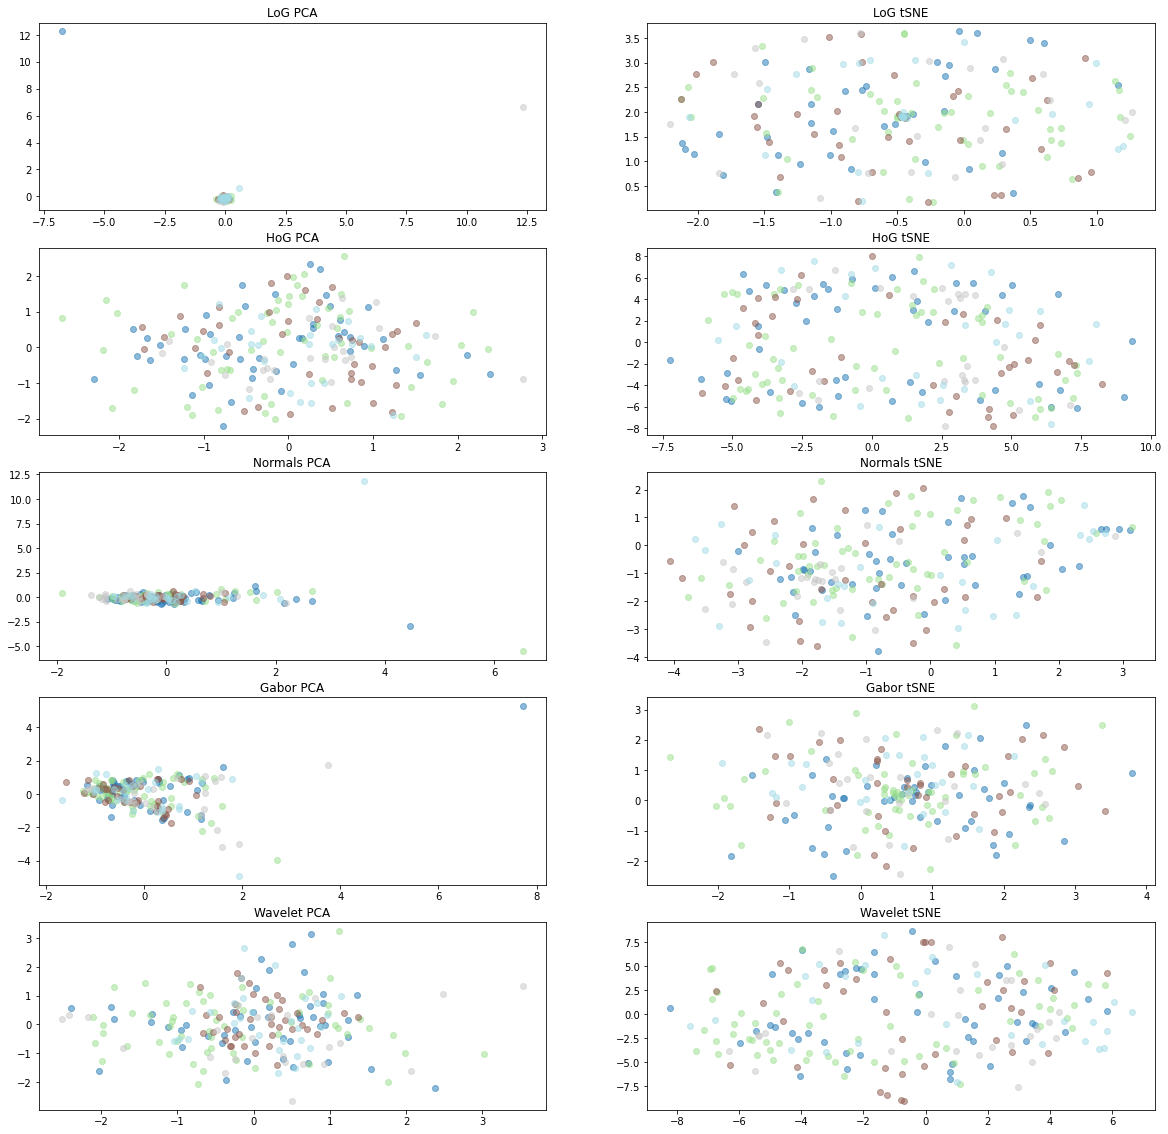

In [18]:
# plot results
labels = label_imgs[:200]
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,20))

# y is the class labels (fabric=denim, wool, polyester, blended, )
plot_classes( X_log_pca, labels, ax[0,0], title='LoG PCA')
plot_classes(X_log_tsne, labels, ax[0,1], title='LoG tSNE')

plot_classes( X_hog_pca, labels, ax[1,0], title='HoG PCA')
plot_classes(X_hog_tsne, labels, ax[1,1], title='HoG tSNE')

plot_classes( X_normals_pca, labels, ax[2,0], title='Normals PCA')
plot_classes(X_normals_tsne, labels, ax[2,1], title='Normals tSNE')

plot_classes( X_gabor_pca, labels, ax[3,0], title='Gabor PCA')
plot_classes(X_gabor_tsne, labels, ax[3,1], title='Gabor tSNE')

plot_classes( X_wavelet_pca, labels, ax[4,0], title='Wavelet PCA')
plot_classes(X_wavelet_tsne, labels, ax[4,1], title='Wavelet tSNE')
plt.show()

In [ ]:
#BoVW only
X_bovw_pca = get_PCA([bovw_features], n_components=2)[-1]
X_bovw_tsne = get_tsne([bovw_features], n_components=2)

In [ ]:
# plot BoVW results
def plot_bovw(X, label, ax, title):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(label)

    # color code each cluster (fabrics label (5))
    colormap = plt.cm.tab20
    colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]

    # project the features into 2 dimensions
    for k in range(len(np.unique(y))):
        # Access elements of X properly
        ax.scatter([X[i][0] for i in range(len(X)) if y[i]==k],
                   [X[i][1] for i in range(len(X)) if y[i]==k],
                   alpha=0.5, facecolors=colorst[k])

    ax.set_title(title)
#plot
labels = label_imgs[:200]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# y is the class labels (fabric=denim, wool, polyester, blended, )
plot_bovw(X_bovw_pca, labels, ax[0], title='BoVW PCA')
plot_bovw(X_bovw_tsne, labels, ax[1], title='BoVW tSNE')
plt.show()